# Default Mode Network Analysis--fMRI & Histogram plot

Name: Nara Alshawareb

Date: 06/12/2024

Link of MRI source: https://neurosynth.org/analyses/terms/default%20network/


### Initiation cell

Importing all necessary python packages

In [1]:
import numpy as np
from nilearn import plotting
import nibabel as nib
import matplotlib.pyplot as plt
import glob

### Code that locates MRI data

To avoid hardcoding the path I use a relative pathname in the glob command. It searches for any files with the extension .nii (because I used *, aka wildcard).
Then using a for loop I search in the collected files ending with .nii for the specific files I need (the anatomical background image and the actual activation data).


It is important to note this code/command only searches for target files located in the working directory the jupyter notebook is saved in. 



In [9]:

MRI_files=glob.glob('*.nii')
for file in MRI_files:
    if file.startswith('anatomical'):
        anatomical_file = file
    if file.startswith('uniformity_test'):
        uniformity_test_file = file


### Visualizing the functional data ontop of the anatomical scan

I use from the package nilearn the plotting function to visualize the functional data (i.e. the uniformity_test file) ontop of the anatomical scan (i.e. anatomical file)

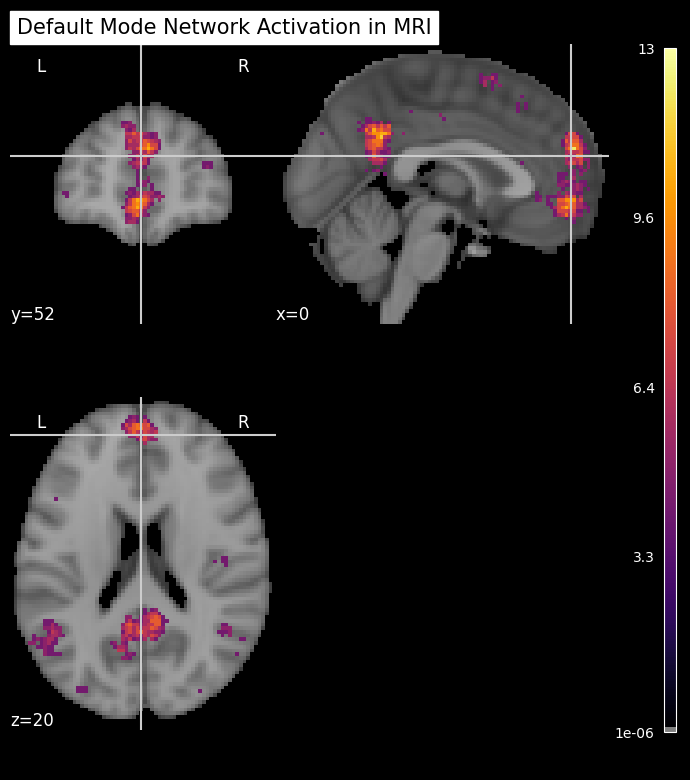

In [11]:
# adjusted the coordinates to display the x=0, y=52, z=20
# adjusted the display mode, because I didn't like the way 
# that only the coronal and horizontal slices had L and R annotations and were very far apart
# so "tiled" seems like a better organization visually
# I chose the color inferno and put dim = 1 because it was the nicest contrast
# set vmin=.1 to exclude voxel activations below that

plot = plotting.plot_stat_map(
    uniformity_test_file, 
    bg_img=anatomical_file, 
    cut_coords=(0,52,20), 
    display_mode='tiled',
    title="Default Mode Network Activation in MRI",  
    cmap='inferno',
    dim=1,
    vmin=0.1
    )



### Historgram of the positive values in the functional data file

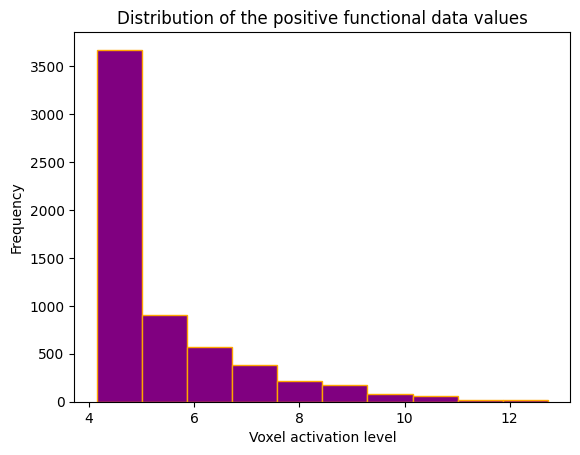

In [12]:
#loading the mri data file into an image
image = nib.load(uniformity_test_file)

#getting the image data from the image
image_data = image.get_fdata()

#converting it to an array so I can use numpy to select the positive values--I realize it works without converting to array but I like numpy
array_image_data= np.array(image_data)

#selecting only the positive values from the image data
positive_only=array_image_data[array_image_data>0]

#plotting a histogram using the positive_only data we selected
fig, ax=plt.subplots(1,1)
ax.axes.hist(positive_only,
             color="purple",
             edgecolor="orange")

#Add a title and x- and y- labels
ax.set_title("Distribution of the positive functional data values")
plt.ylabel("Frequency")
plt.xlabel("Voxel activation level")

plt.show()

##### Conclusion: 
We now have two figures: one brain map and histogram! 